# Task 1: Exploratory Data analysis

In [1]:
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# nltk
import nltk
from nltk.text import Text
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

### First read the INPUT file into dataframe

In [2]:
list_of_lists = []

with open('data/Dev/INPUT.txt') as f:                                   #Read the INPUT file
    for line in f:
        inner_list = [line.strip() for line in line.split('UNKNOWN')]   #Remove 'UNKNOWN' in each line, seperate ID and tweets, store in inner_list
        list_of_lists.append(inner_list)                                #Append each line into list_of_lists

df = pd.DataFrame(list_of_lists, columns = ["ID", "Tweets"])            #Put all ID and Tweets data into dataframe and name columns label
df.head(10)                                                             #Show top 10 lines

,ID,Tweets
0,801989080477154944,#ArianaGrande Ari By Ariana Grande 80% Full ht...
1,801989272341453952,Ariana Grande KIIS FM Yours Truly CD listening...
2,801990978424962944,Ariana Grande White House Easter Egg Roll in W...
3,801996232553963008,#CD #Musics Ariana Grande Sweet Like Candy 3.4...
4,801998343442407040,SIDE TO SIDE 😘 @arianagrande #sidetoside #aria...
5,802001659970744064,Hairspray Live! Previews at the Macy's Thanksg...
6,802003380973568000,#LindsayLohan Is ‘Feeling Thankful’ After Blas...
7,802014830467174016,I hate her but... I love her songs Dammit ._.#...
8,802020578609623040,Ariana Grande 【Right There ft. Big Sean】#アリアナ ...
9,802021059490934016,which one would you prefer to listen to for a ...


### Tokenization

In [3]:
from nltk.tokenize import WhitespaceTokenizer
import emoji


RE = "@\S+|https?:\S+|http?:\S|https://t.co/\S+|[^A-Za-z0-9]+" #Set flag to allow verbose regexps

def extract_emojis(str):                                       #Define a function to extract emoji from tweets
    emoji_list = []
    for c in str:
        if c in emoji.UNICODE_EMOJI:
            emoji_list.append(c)
    return emoji_list

nltk.download('stopwords')                                     #Download stopwords
stop_words = stopwords.words("english")                        #Use stopwords in Eniglish
stemmer = SnowballStemmer("english")                            


def Without_stopword(str):                                     #Define a function to store and return texts without stopwords
    text_without_stopword = []
    for c in str:
        if c not in stop_words:
            text_without_stopword.append(c)                    #if does not include stopword, append into list
    return text_without_stopword

##Tokenization
for idx, row in df.iterrows():
    ##Seperate text and emoji into new columns, and a column of text without stopwords
    #normalize text to lower cases
    df.loc[idx, "Text"] = [', '.join(WhitespaceTokenizer().tokenize(re.sub(RE, ' ', df.loc[idx, "Tweets"].lower()).strip()))]
    #extract emoji and put into a new column
    df.loc[idx, "Emoji"] = [', '.join(extract_emojis(df.loc[idx, "Tweets"]))]
    #a new column for text without stopwords
    df.loc[idx, "Text_without_stopword"] = [', '.join(Without_stopword(df.loc[idx, "Text"]))] 
    
for idx, row in df.iterrows():
    df.loc[idx, "Text"] = WhitespaceTokenizer().tokenize(re.sub(RE, ' ', df.loc[idx, "Tweets"].lower()).strip())  
    df.loc[idx, "Emoji"] = extract_emojis(df.loc[idx, "Tweets"])
    #remove all stopwords
    df.loc[idx, "Text_without_stopword"] = Without_stopword(df.loc[idx, "Text"])   
       

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liangyating/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df.head()  #show top 5 rows in dataframe

,ID,Tweets,Text,Emoji,Text_without_stopword
0,801989080477154944,#ArianaGrande Ari By Ariana Grande 80% Full ht...,"[arianagrande, ari, by, ariana, grande, 80, fu...",[],"[arianagrande, ari, ariana, grande, 80, full, ..."
1,801989272341453952,Ariana Grande KIIS FM Yours Truly CD listening...,"[ariana, grande, kiis, fm, yours, truly, cd, l...",[],"[ariana, grande, kiis, fm, truly, cd, listenin..."
2,801990978424962944,Ariana Grande White House Easter Egg Roll in W...,"[ariana, grande, white, house, easter, egg, ro...",[],"[ariana, grande, white, house, easter, egg, ro..."
3,801996232553963008,#CD #Musics Ariana Grande Sweet Like Candy 3.4...,"[cd, musics, ariana, grande, sweet, like, cand...",[],"[cd, musics, ariana, grande, sweet, like, cand..."
4,801998343442407040,SIDE TO SIDE 😘 @arianagrande #sidetoside #aria...,"[side, to, side, arianagrande, sidetoside, ari...","[😘, 🌈]","[side, side, arianagrande, sidetoside, arianag..."


# Exploratory Data analysis - INPUT data

### The total number of tweets: 12284

In [5]:
df.shape  #Show how many rows and columns in dataframe, row:12284 column:4
Total_tweets = len(df)

Total_tweets

12284

### The total number of characters: 900101

In [6]:
from itertools import chain
Total_lst = []
for idx, row in df.iterrows():
    Total_lst.append(df.loc[idx, "Text"])        #append each line in df column "Text" into Total_1st list
    
Total_lst = list(chain.from_iterable(Total_lst)) #seperate each element in each row and put them each into Total_1st
Total_char = 0
for i in Total_lst:                              #each row's length is the number of characters in this row
    Total_char = Total_char + len(i)             #add them up to show total number of characters

Total_char


900101

### The total number of characters without stop words: 721913

In [7]:
Total_without_stopword = []
#Repeat the same step with "Text_without_stopword"
for idx, row in df.iterrows():
    #append each line in df column "Text_without_stopword" into a new Total_without_stopword list
    Total_without_stopword.append(df.loc[idx, "Text_without_stopword"]) 
#seperate each element in each row put them all into list
Total_without_stopword = list(chain.from_iterable(Total_without_stopword))
Total_char2 = 0
for i in Total_without_stopword:                   #each row's length is the number of characters in this row
    Total_char2 = Total_char2 + len(i)             #add them up to show total number of characters

Total_char2

721913

### The total number of distinct words (vocabulary): 22577

In [8]:
uniqueList = []
#Use for loop to screen words that are not already in uniqueList and put them into it
for word in Total_lst:
    if word not in uniqueList:  
        uniqueList.append(word)
#the length of uniqueList would be the total number of distinct words
len(uniqueList)

22577

### The total number of distinct (words without stop words) : 22427

In [9]:
#Repeat the same steps with Text without stopwords
uniqueList_without_stopword = []
#Use for loop to screen words that are not already in uniqueList and put them into it
for word in Total_without_stopword:
    if word not in uniqueList_without_stopword:
        uniqueList_without_stopword.append(word)
#the length of uniqueList would be the total number of distinct words(texts without stopwords)
len(uniqueList_without_stopword)

22427

### The average number of words in each tweet: 15.14
### The average number of characters in each tweet: 73.27

In [10]:
#Add a new column "Tweet_length" which equals length of text plus length of emojis in each row(tweet)
for idx, row in df.iterrows():
    df.loc[idx, "Tweet_length"] = len(df.loc[idx, "Text"]) + len(df.loc[idx, "Emoji"]) 
#Using np.mean to calculate the mean of this column - the average of number words of all tweets
print(np.mean(df.Tweet_length)) #The average number of words in each tweet
print(Total_char/Total_tweets)  #The average number of characters in each tweet

15.141647671768153
73.27425919895799


### The average number of words in each tweet (without stop words): 9.73
### The average number of characters in each tweet (without stop words): 58.77

In [11]:
for idx, row in df.iterrows():
    df.loc[idx, "Tweet_length_without_stopword"] = len(df.loc[idx, "Text_without_stopword"]) + len(df.loc[idx, "Emoji"]) 
print(np.mean(df.Tweet_length_without_stopword)) #The average number of words in each tweet (without stop words)
print(Total_char2/Total_tweets)                  #The average number of characters in each tweet(without stop words)

9.732823184630414
58.7685607294041


 ### The average number of characters per token: 4.88
 ### The standard deviation of characters per token: 2.97

In [12]:
token_len = []
for i in Total_lst:
    token_len.append(len(i))  #Append each token's length into list
print(np.mean(token_len))     #The average number of characters per token
print(np.std(token_len))      #The standard deviation of characters per token


4.884526471162821
2.9701349050810446


### The total number of tokens corresponding to the top 10 most frequent words (types) in the vocabulary

In [13]:
from nltk.probability import FreqDist

freqdist = FreqDist(Total_lst) #Count frequncy of each word in list 
freqdist.most_common(10)       #top 10 most frequent words in "Text"

[('the', 5755),
 ('to', 3804),
 ('a', 2969),
 ('of', 2601),
 ('and', 2468),
 ('in', 2284),
 ('is', 2256),
 ('s', 2225),
 ('i', 2206),
 ('for', 1950)]

### The total number of tokens corresponding to the top 10 most frequent words (types) without stopwords in the vocabulary

In [14]:
from nltk.probability import FreqDist

freqdist_without_stopword = FreqDist(Total_without_stopword) 
freqdist_without_stopword.most_common(10)  #top 10 most frequent words in "Text_without_stopword"

[('trump', 1180),
 ('like', 498),
 ('via', 389),
 ('people', 379),
 ('get', 362),
 ('one', 340),
 ('us', 317),
 ('new', 308),
 ('2', 303),
 ('obama', 295)]

### The token/type ratio in the dataset: 8.16

In [15]:
len(Total_lst) / len(uniqueList)

8.162111883775523

### The token/type ratio without stopwords in the dataset: 5.25

In [16]:
len(Total_without_stopword) / len(uniqueList_without_stopword)

5.254113345521024

### The total number of distinct n-grams (of words) that appear in the dataset for n=2,3,4,5.

In [17]:
import collections
from nltk.util import ngrams


bigrams = list(ngrams(Total_lst, 2))         #Use ngrams with 2 to find all bigrams of words in text list
bigrams_freq = collections.Counter(bigrams)  #Count frequncies of them and sort
print(len(bigrams_freq))                     #Find total number
#print(bigrams_freq)

118924


In [18]:
trigrams = list(ngrams(Total_lst, 3))          #Use ngrams with 3 to find all trigrams of words in text list
trigrams_freq = collections.Counter(trigrams)  #Count frequncies of them and sort
print(len(trigrams_freq))
#print(trigrams_freq)

168098


In [19]:
fourgrams = list(ngrams(Total_lst, 4))          #Use ngrams with 4 to find all fourgrams of words in text list
fourgrams_freq = collections.Counter(fourgrams) #Count frequncies of them and sort
print(len(fourgrams_freq))
#print(fourgrams_freq)

179988


In [20]:
fivegrams = list(ngrams(Total_lst, 5))          #Use ngrams with 5 to find all fivegrams of words in text list
fivegrams_freq = collections.Counter(fivegrams) #Count frequncies of them and sort
print(len(fivegrams_freq))
#print(fivegrams_freq)

182698


### The total number of distinct n-grams of characters that appear for n=2,3,4,5,6,7

In [21]:
t_char = []
for i in Total_lst:
    for j in i:
        t_char.append(j)                          #append all characters into t_char list
bigrams_ch = list(ngrams(t_char, 2))              #Use ngrams with 2 to find all bigrams of characters    
bigrams_ch_freq = collections.Counter(bigrams_ch) #Count frequncies of them and sort
print(len(bigrams_ch_freq))                       #Find total number of distinct n-grams of characters for n=2
#print(bigrams_ch_freq)

1246


In [22]:
trigrams_ch = list(ngrams(t_char, 3))               #Use ngrams with 3 to find all trigrams of characters    
trigrams_ch_freq = collections.Counter(trigrams_ch) #Count frequncies of them and sort
print(len(trigrams_ch_freq))                        #Find total number of distinct n-grams of characters for n=3
#print(trigrams_ch_freq)

16758


In [23]:
fourgrams_ch = list(ngrams(t_char, 4))                #Use ngrams with 4 to find all fourgrams of characters    
fourgrams_ch_freq = collections.Counter(fourgrams_ch) #Count frequncies of them and sort
print(len(fourgrams_ch_freq))                         #Find total number of distinct n-grams of characters for n=4
#print(fourgrams_ch_freq)

84670


In [24]:
fivegrams_ch = list(ngrams(t_char, 5))                #Use ngrams with 5 to find all fivegrams of characters    
fivegrams_ch_freq = collections.Counter(fivegrams_ch) #Count frequncies of them and sort
print(len(fivegrams_ch_freq))                         #Find total number of distinct n-grams of characters for n=5
#print(fivegrams_ch_freq)

236220


In [25]:
sixgrams_ch = list(ngrams(t_char, 6))                #Use ngrams with 6 to find all sixgrams of characters    
sixgrams_ch_freq = collections.Counter(sixgrams_ch)  #Count frequncies of them and sort
print(len(sixgrams_ch_freq))                         #Find total number of distinct n-grams of characters for n=6
#print(sixgrams_ch_freq)

408404


In [26]:
sevengrams_ch = list(ngrams(t_char, 7))                  #Use ngrams with 7 to find all sevengrams of characters    
sevengrams_ch_freq = collections.Counter(sevengrams_ch)  #Count frequncies of them and sort
print(len(sevengrams_ch_freq))                           #Find total number of distinct n-grams of characters for n=7
#print(sevengrams_ch_freq)

546446


### Plot a token log frequency. Describe what this plot means and how to interpret it.

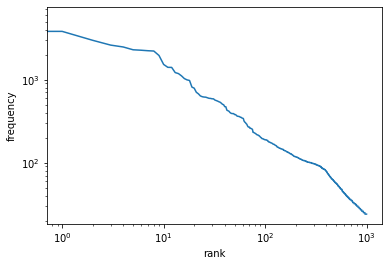

In [27]:
def token_log_freq(corpus):
    corpus_counts = Counter(corpus)
    plt.loglog([val for word, val in corpus_counts.most_common(1000)])
    plt.xlabel('rank')
    plt.ylabel('frequency')
    #plt.show()
    return
token_log_freq(Total_lst)

##### The graph looks approximately linear, so the plot is approximately accurate. This means that the word count distributions indeed follow a power law. According to Zipf's law, the frequency of any word is inversely proportional to its rank in the frequency table.

# Gold EDA

In [28]:
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# nltk
import nltk
from nltk.text import Text
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

## Input data - dev, train, dev test

In [29]:
list_of_lists = []     # create an empty list for dev.txt

with open('data/Gold/dev.txt') as f:    # put the dev.txt into the list
    for line in f:
        inner_list = [line.strip() for line in line.split('\t')]
        list_of_lists.append(inner_list)

dev_df = pd.DataFrame(list_of_lists, columns = ["ID", "polarity","Tweets"])    # change the list to a csv table
dev_df.head(10)   # check

,ID,polarity,Tweets
0,638060586258038784,neutral,05 Beat it - Michael Jackson - Thriller (25th ...
1,638061181823922176,positive,Jay Z joins Instagram with nostalgic tribute t...
2,638083821364244480,neutral,Michael Jackson: Bad 25th Anniversary Edition ...
3,638091450132078593,positive,I liked a @YouTube video http://t.co/AaR3pjp2P...
4,638125563790557184,positive,18th anniv of Princess Diana's death. I still ...
5,638130776727535617,positive,@oridaganjazz The 1st time I heard Michael Jac...
6,638134980862828544,neutral,'Michael Jackson' appeared on Saturday 29 at t...
7,638156605448695808,positive,Are you old enough to remember Michael Jackson...
8,638162155250954241,negative,@etbowser do u enjoy his 2nd rate Michael Jack...
9,638163324752891908,neutral,The Weeknd is the closest thing we may get to ...


In [30]:
list_of_lists = []   # create an empty list for train.txt

with open('data/Gold/train.txt') as f:   # put the train.txt into the list
    for line in f:
        inner_list = [line.strip() for line in line.split('\t')]
        list_of_lists.append(inner_list)

train_df = pd.DataFrame(list_of_lists, columns = ["ID", "polarity","Tweets"])    # change the list to a csv table
train_df.head(10)     #check

,ID,polarity,Tweets
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...
1,628976607420645377,negative,@Microsoft how about you make a system that do...
2,629023169169518592,negative,I may be ignorant on this issue but... should ...
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ..."
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...
5,629226490152914944,positive,"Microsoft, I may not prefer your gaming branch..."
6,629345637155360768,negative,@MikeWolf1980 @Microsoft I will be downgrading...
7,629394528336637953,negative,@Microsoft 2nd computer with same error!!! #Wi...
8,629650766580609026,positive,Just ordered my 1st ever tablet; @Microsoft Su...
9,629797991826722816,negative,"After attempting a reinstall, it still bricks,..."


In [31]:
list_of_lists = []    # create an empty list for test.txt

with open('data/Gold/test.txt') as f:    # put test.txt into the list
    for line in f:
        inner_list = [line.strip() for line in line.split('\t')]
        list_of_lists.append(inner_list)

test_df = pd.DataFrame(list_of_lists)   # change the list to a csv table
test_df = test_df.drop(3, axis = 1)     # delete the last empty column
test_df.columns = ["ID", "polarity","Tweets"] # add labels
test_df.head(10)  # check

,ID,polarity,Tweets
0,619950566786113536,neutral,"""Picturehouse's, Pink Floyd's, 'Roger Waters: ..."
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195045888,negative,"""If these runway renovations at the airport pr..."
3,619974445185302528,neutral,"""If you could ask an onstage interview questio..."
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...
5,619994586182619136,positive,"""Excited to read """"Go Set a Watchman"""" on Tues..."
6,619998879447162881,positive,"""Watching Miss USA tomorrow JUST to see @Travi..."
7,619999109991284737,neutral,"""Tune-in for the 2015 MISS USA Pageant on Reel..."
8,620013074272137216,positive,Call for reservations for lunch or dinner tomo...
9,620015047889154048,neutral,"""Miss Universe Org prez tells me #Trump won't ..."


In [32]:
list_of_lists = []  # create an empty list for devtest.txt

with open('data/Gold/devtest.txt') as f:   # put the devtest.txt into the list
    for line in f:
        inner_list = [line.strip() for line in line.split('\t')]
        list_of_lists.append(inner_list)

devtest_df = pd.DataFrame(list_of_lists, columns = ["ID", "polarity","Tweets"])  # change the list to a csv table
devtest_df.head(10)  # check

,ID,polarity,Tweets
0,637641175948763136,neutral,@SeeMonterey LOST - Sony cell phone with holid...
1,637651487762554881,neutral,"@PersonaSoda well yeah, that's third parties. ..."
2,637666734300905472,negative,Sony rewards app is like a lot of 19 y.o femal...
3,637668142110654468,neutral,@fakethom Have android tab and don't use phone...
4,637708370129125377,positive,Finally I get my ps4 back I sent it to Sony ca...
5,637807521500020737,negative,@AskPlayStation Why won't u guys help me out?!...
6,637857585652076544,neutral,Sony's 1st teaser package for the launch of th...
7,637859860017647616,neutral,#tv Ind vs SL 3rd Test Day 3: Cricket live sco...
8,637923877423742977,neutral,@TruthInsider @bertymufc @gamerxone720 @PNF4LY...
9,638045103861465088,neutral,"@greencapt Official reason, because the game h..."


## Tokenization

In [33]:
from nltk.tokenize import WhitespaceTokenizer

RE = "@\S+|https?:\S+|http?:\S|https://t.co/\S+|[^A-Za-z0-9]+"

nltk.download('stopwords')
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def Without_stopword(str):  # remove stopwords from tweets
    text_without_stopword = []
    for c in str:
        if c not in stop_words:
            text_without_stopword.append(c)
    return text_without_stopword


for idx, row in dev_df.iterrows():   # get pure text and text without stopwords for dev.txt
    dev_df.loc[idx, "Text"] = [', '.join(WhitespaceTokenizer().tokenize(re.sub(RE, ' ', dev_df.loc[idx, "Tweets"].lower()).strip()))]
    dev_df.loc[idx, "Text_without_stopword"] = [', '.join(Without_stopword(dev_df.loc[idx, "Text"]))]
    dev_df.loc[idx, "Text"] = WhitespaceTokenizer().tokenize(re.sub(RE, ' ', dev_df.loc[idx, "Tweets"].lower()).strip())
    dev_df.loc[idx, "Text_without_stopword"] = Without_stopword(dev_df.loc[idx, "Text"])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liangyating/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
for idx, row in train_df.iterrows():   # get pure text and text without stopwords for train.txt
    train_df.loc[idx, "Text"] = [', '.join(WhitespaceTokenizer().tokenize(re.sub(RE, ' ', train_df.loc[idx, "Tweets"].lower()).strip()))]
    train_df.loc[idx, "Text_without_stopword"] = [', '.join(Without_stopword(train_df.loc[idx, "Text"]))]
    train_df.loc[idx, "Text"] = WhitespaceTokenizer().tokenize(re.sub(RE, ' ', train_df.loc[idx, "Tweets"].lower()).strip())
    train_df.loc[idx, "Text_without_stopword"] = Without_stopword(train_df.loc[idx, "Text"])

In [35]:
for idx, row in test_df.iterrows():    # get pure text and text without stopwords for test.txt
    test_df.loc[idx, "Text"] = [', '.join(WhitespaceTokenizer().tokenize(re.sub(RE, ' ', test_df.loc[idx, "Tweets"].lower()).strip()))]
    test_df.loc[idx, "Text_without_stopword"] = [', '.join(Without_stopword(test_df.loc[idx, "Text"]))]
    test_df.loc[idx, "Text"] = WhitespaceTokenizer().tokenize(re.sub(RE, ' ', test_df.loc[idx, "Tweets"].lower()).strip())
    test_df.loc[idx, "Text_without_stopword"] = Without_stopword(test_df.loc[idx, "Text"])

In [36]:
for idx, row in devtest_df.iterrows():   # get pure text and text without stopwords for devtest.txt
    devtest_df.loc[idx, "Text"] = [', '.join(WhitespaceTokenizer().tokenize(re.sub(RE, ' ', devtest_df.loc[idx, "Tweets"].lower()).strip()))]
    devtest_df.loc[idx, "Text_without_stopword"] = [', '.join(Without_stopword(devtest_df.loc[idx, "Text"]))]
    devtest_df.loc[idx, "Text"] = WhitespaceTokenizer().tokenize(re.sub(RE, ' ', devtest_df.loc[idx, "Tweets"].lower()).strip())
    devtest_df.loc[idx, "Text_without_stopword"] = Without_stopword(devtest_df.loc[idx, "Text"])

In [37]:
dev_df.head() # check

,ID,polarity,Tweets,Text,Text_without_stopword
0,638060586258038784,neutral,05 Beat it - Michael Jackson - Thriller (25th ...,"[05, beat, it, michael, jackson, thriller, 25t...","[05, beat, michael, jackson, thriller, 25th, a..."
1,638061181823922176,positive,Jay Z joins Instagram with nostalgic tribute t...,"[jay, z, joins, instagram, with, nostalgic, tr...","[jay, z, joins, instagram, nostalgic, tribute,..."
2,638083821364244480,neutral,Michael Jackson: Bad 25th Anniversary Edition ...,"[michael, jackson, bad, 25th, anniversary, edi...","[michael, jackson, bad, 25th, anniversary, edi..."
3,638091450132078593,positive,I liked a @YouTube video http://t.co/AaR3pjp2P...,"[i, liked, a, youtube, video, one, direction, ...","[liked, youtube, video, one, direction, singin..."
4,638125563790557184,positive,18th anniv of Princess Diana's death. I still ...,"[18th, anniv, of, princess, diana, s, death, i...","[18th, anniv, princess, diana, death, still, w..."


In [38]:
test_df.head()  # check

,ID,polarity,Tweets,Text,Text_without_stopword
0,619950566786113536,neutral,"""Picturehouse's, Pink Floyd's, 'Roger Waters: ...","[picturehouse, s, pink, floyd, s, roger, water...","[picturehouse, pink, floyd, roger, waters, wal..."
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...,"[order, go, set, a, watchman, in, store, or, t...","[order, go, set, watchman, store, website, tue..."
2,619971047195045888,negative,"""If these runway renovations at the airport pr...","[if, these, runway, renovations, at, the, airp...","[runway, renovations, airport, prevent, seeing..."
3,619974445185302528,neutral,"""If you could ask an onstage interview questio...","[if, you, could, ask, an, onstage, interview, ...","[could, ask, onstage, interview, question, mis..."
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,"[a, portion, of, book, sales, from, our, harpe...","[portion, book, sales, harper, lee, go, set, w..."


In [39]:
train_df.head()  # check

,ID,polarity,Tweets,Text,Text_without_stopword
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...,"[dear, microsoft, the, newooffice, for, mac, i...","[dear, microsoft, newooffice, mac, great, lync..."
1,628976607420645377,negative,@Microsoft how about you make a system that do...,"[how, about, you, make, a, system, that, doesn...","[make, system, eat, friggin, discs, 2nd, time,..."
2,629023169169518592,negative,I may be ignorant on this issue but... should ...,"[i, may, be, ignorant, on, this, issue, but, s...","[may, ignorant, issue, celebrate, microsoft, p..."
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ...","[thanks, to, microsoft, i, just, may, be, swit...","[thanks, microsoft, may, switching, apple]"
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...,"[if, i, make, a, game, as, a, windows10, unive...","[make, game, windows10, universal, app, xboxon..."


In [40]:
devtest_df.head()  # check

,ID,polarity,Tweets,Text,Text_without_stopword
0,637641175948763136,neutral,@SeeMonterey LOST - Sony cell phone with holid...,"[lost, sony, cell, phone, with, holiday, photo...","[lost, sony, cell, phone, holiday, photos, ear..."
1,637651487762554881,neutral,"@PersonaSoda well yeah, that's third parties. ...","[well, yeah, that, s, third, parties, sony, it...","[well, yeah, third, parties, sony, putting, ac..."
2,637666734300905472,negative,Sony rewards app is like a lot of 19 y.o femal...,"[sony, rewards, app, is, like, a, lot, of, 19,...","[sony, rewards, app, like, lot, 19, female, si..."
3,637668142110654468,neutral,@fakethom Have android tab and don't use phone...,"[have, android, tab, and, don, t, use, phone, ...","[android, tab, use, phone, much, fact, little,..."
4,637708370129125377,positive,Finally I get my ps4 back I sent it to Sony ca...,"[finally, i, get, my, ps4, back, i, sent, it, ...","[finally, get, ps4, back, sent, sony, cause, h..."


# Exploratory Data analysis

### What is the number of types that appear in the dev data but not the training data (OOV): 2816

In [41]:
from itertools import chain
dev_total_lst = []
for idx, row in dev_df.iterrows():
    dev_total_lst.append(dev_df.loc[idx, "Text"])
    
dev_total_lst = list(chain.from_iterable(dev_total_lst)) # get a list of words in dev.txt

train_total_lst = []
for idx, row in train_df.iterrows():
    train_total_lst.append(train_df.loc[idx, "Text"])
    
train_total_lst = list(chain.from_iterable(train_total_lst))  # get a list of words in train.txt

In [42]:
dev_uniqueList = []

for word in dev_total_lst:   # get the list of unique words in dev.txt
    if word not in dev_uniqueList:
        dev_uniqueList.append(word)

train_uniqueList = []

for word in train_total_lst:    # get the list of unique words in train.txt
    if word not in train_uniqueList:
        train_uniqueList.append(word)

In [43]:
word_in_dev_not_train = []
for word in dev_uniqueList:  # get the list of unique words in dev.txt but not in train.txt
    if word not in train_uniqueList:
        word_in_dev_not_train.append(word)
len(word_in_dev_not_train)  # get the number of the unique words in dev.txt but not in train.txt

2816

### Look at the vocabulary growth (types) combining your four gold data sets against your input data. Plot vocabulary growth at difference sample sizes N.

In [44]:
# combine gold data sets
from itertools import chain
test_total_lst = []
for idx, row in test_df.iterrows():
    test_total_lst.append(test_df.loc[idx, "Text"])
    
test_total_lst = list(chain.from_iterable(test_total_lst)) # get a list of words in test.txt

devtest_total_lst = []
for idx, row in devtest_df.iterrows():
    devtest_total_lst.append(devtest_df.loc[idx, "Text"])
    
devtest_total_lst = list(chain.from_iterable(devtest_total_lst))  # get a list of words in devtest.txt

combinedlist = dev_total_lst + train_total_lst + test_total_lst + devtest_total_lst

In [45]:
# get the list of words in the input data
list_of_lists = []

with open('data/Dev/INPUT.txt', 'r', encoding = 'UTF-8') as f:          #Read the INPUT file
    for line in f:
        inner_list = [line.strip() for line in line.split('UNKNOWN')]   #Remove 'UNKNOWN' in each line, seperate ID and tweets, store in inner_list
        list_of_lists.append(inner_list)                                #Append each line into list_of_lists

df = pd.DataFrame(list_of_lists, columns = ["ID", "Tweets"])            #Put all ID and Tweets data into dataframe and name columns label

from nltk.tokenize import WhitespaceTokenizer

RE = "@\S+|https?:\S+|http?:\S|https://t.co/\S+|[^A-Za-z0-9]+" #Set flag to allow verbose regexps

##Tokenization
for idx, row in df.iterrows():
    ##Seperate text into a new column
    #normalize text to lower cases
    df.loc[idx, "Text"] = [', '.join(WhitespaceTokenizer().tokenize(re.sub(RE, ' ', df.loc[idx, "Tweets"].lower()).strip()))]
    df.loc[idx, "Text"] = WhitespaceTokenizer().tokenize(re.sub(RE, ' ', df.loc[idx, "Tweets"].lower()).strip())

from itertools import chain

Total_lst = []

for idx, row in df.iterrows():
    Total_lst.append(df.loc[idx, "Text"])        #append each line in df column "Text" into Total_1st list
    
Total_lst = list(chain.from_iterable(Total_lst)) #seperate each element in each row and put them each into Total_1st

In [46]:
# get the first 25% parts
N_1 = round(len(combinedlist)/4)
firstcombine = combinedlist[:N_1] # get the first 25% part of the combinedlist

firstcombine_uniqueList = []

for word in firstcombine:   # get the list of unique words in firstcombine
    if word not in firstcombine_uniqueList:
        firstcombine_uniqueList.append(word)

a_1 = len(firstcombine_uniqueList)  # get the number of vocabulary in firstcombine
        
N_2 = round(len(Total_lst)/4)
firstinput = Total_lst[:N_2]  # get the first 25% part of the Total_lst

firstinput_uniqueList = []

for word in firstinput:   # get the list of unique words in firstinput
    if word not in firstinput_uniqueList:
        firstinput_uniqueList.append(word)
        
b_1 = len(firstinput_uniqueList)  # get the number of vocabulary in firstinput

In [47]:
# get the first 50% parts
N_1 = round(len(combinedlist)/2)
secondcombine = combinedlist[:N_1] # get the first 50% part of the combinedlist

secondcombine_uniqueList = []

for word in secondcombine:   # get the list of unique words in secondcombine
    if word not in secondcombine_uniqueList:
        secondcombine_uniqueList.append(word)
        
a_2 = len(secondcombine_uniqueList)  # get the number of vocabulary in secondcombine
        
N_2 = round(len(Total_lst)/2)
secondinput = Total_lst[:N_2]  # get the first 50% part of the Total_lst

secondinput_uniqueList = []

for word in secondinput:   # get the list of unique words in secondinput
    if word not in secondinput_uniqueList:
        secondinput_uniqueList.append(word)
        
b_2 = len(secondinput_uniqueList)   # get the number of vocabulary in secondinput

In [48]:
# get the first 75% parts
N_1 = round(len(combinedlist)*0.75)
thirdcombine = combinedlist[:N_1] # get the first 75% part of the combinedlist

thirdcombine_uniqueList = []

for word in thirdcombine:   # get the list of unique words in thirdcombine
    if word not in thirdcombine_uniqueList:
        thirdcombine_uniqueList.append(word)
        
a_3 = len(thirdcombine_uniqueList)  # get the number of vocabulary in thirdcombine
        
N_2 = round(len(Total_lst)*0.75)
thirdinput = Total_lst[:N_2]  # get the first 75% part of the Total_lst

thirdinput_uniqueList = []

for word in thirdinput:   # get the list of unique words in thirdinput
    if word not in thirdinput_uniqueList:
        thirdinput_uniqueList.append(word)
        
b_3 = len(thirdinput_uniqueList)   # get the number of vocabulary in thirdinput

In [49]:
# get the 100% parts
N_1 = len(combinedlist)
fourthcombine = combinedlist[:N_1] # get the 100% part of the combinedlist

fourthcombine_uniqueList = []

for word in fourthcombine:   # get the list of unique words in fourthcombine
    if word not in fourthcombine_uniqueList:
        fourthcombine_uniqueList.append(word)
        
a_4 = len(fourthcombine_uniqueList)  # get the number of vocabulary in fourthcombine
        
N_2 = len(Total_lst)
fourthinput = Total_lst[:N_2]  # get the 100% part of the Total_lst

fourthinput_uniqueList = []

for word in fourthinput:   # get the list of unique words in fourthinput
    if word not in fourthinput_uniqueList:
        fourthinput_uniqueList.append(word)
        
b_4 = len(fourthinput_uniqueList)  # get the number of vocabulary in fourthinput

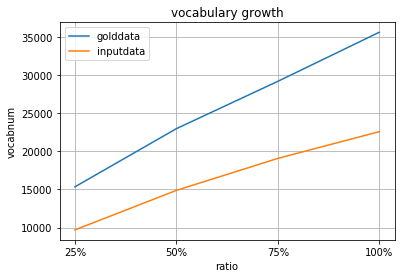

In [50]:
# plot the vocabulary growth
y_1 = [a_1, a_2, a_3, a_4]
y_2 = [b_1, b_2, b_3, b_4]
x_1 = range(0, 4)
x_2 = range(0, 4)
plt.plot(x_1,y_1,'',label="golddata")
plt.plot(x_2,y_2,'',label="inputdata")
plt.title('vocabulary growth')
plt.legend(loc='upper left')
plt.xticks((0,1,2,3),('25%','50%','75%','100%'))
plt.xlabel('ratio')
plt.ylabel('vocabnum')
plt.grid(x_1)
plt.show()

### What is the class distribution of the training data set - how many negative, neutral, positive tweets?

In [51]:
class_dis = train_df.groupby('polarity').ID.count() # count for polarity
class_dis

polarity
negative     863
neutral     2043
positive    3094
Name: ID, dtype: int64

### Look at the difference between the top word types across these three classes. - train

In [52]:
pos_train_total = []
neg_train_total = []
neu_train_total = []

for idx, row in train_df.iterrows():   # seperate the text without stopwords from train.txt into three lists by polarity
    if train_df.loc[idx, "polarity"] == "positive":
        pos_train_total.append(train_df.loc[idx, "Text_without_stopword"])
    if train_df.loc[idx, "polarity"] == "negative":
        neg_train_total.append(train_df.loc[idx, "Text_without_stopword"])
    if train_df.loc[idx, "polarity"] == "neutral":
        neu_train_total.append(train_df.loc[idx, "Text_without_stopword"])
        
pos_train_total = list(chain.from_iterable(pos_train_total))  # change the lists of sentences to lists of single words
neg_train_total = list(chain.from_iterable(neg_train_total))
neu_train_total = list(chain.from_iterable(neu_train_total))

In [53]:
from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_train_total) # get the frequency of words from positive class of train.txt
pos_freqdist.most_common(10)

[('tomorrow', 581),
 ('may', 459),
 ('day', 320),
 ('see', 262),
 ('going', 248),
 ('amp', 217),
 ('friday', 200),
 ('new', 194),
 ('apple', 191),
 ('time', 186)]

In [54]:
from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_train_total) # get the frequency of words from negative class of train.txt
neg_freqdist.most_common(10)

[('may', 216),
 ('day', 93),
 ('amazon', 84),
 ('like', 83),
 ('tomorrow', 76),
 ('prime', 68),
 ('1st', 65),
 ('trump', 62),
 ('amp', 57),
 ('erdogan', 55)]

In [55]:
from nltk.probability import FreqDist

neu_freqdist = FreqDist(neu_train_total)  # get the frequency of words from neutral class of train.txt
neu_freqdist.most_common(10)

[('may', 420),
 ('tomorrow', 239),
 ('day', 136),
 ('apple', 133),
 ('1st', 131),
 ('google', 115),
 ('like', 114),
 ('going', 107),
 ('watch', 104),
 ('new', 103)]

### Look at the difference between the top word types across these three classes. - dev

In [56]:
pos_dev_total = []
neg_dev_total = []
neu_dev_total = []

for idx, row in dev_df.iterrows():    # seperate the text without stopwords from dev.txt into three lists by polarity
    if dev_df.loc[idx, "polarity"] == "positive":
        pos_dev_total.append(dev_df.loc[idx, "Text_without_stopword"])
    if dev_df.loc[idx, "polarity"] == "negative":
        neg_dev_total.append(dev_df.loc[idx, "Text_without_stopword"])
    if dev_df.loc[idx, "polarity"] == "neutral":
        neu_dev_total.append(dev_df.loc[idx, "Text_without_stopword"])
        
pos_dev_total = list(chain.from_iterable(pos_dev_total))  # change the lists of sentences to lists of single words
neg_dev_total = list(chain.from_iterable(neg_dev_total))
neu_dev_total = list(chain.from_iterable(neu_dev_total))

In [57]:
from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_dev_total) # get the frequency of words from positive class of dev.txt
pos_freqdist.most_common(10)

[('may', 138),
 ('tomorrow', 129),
 ('minecraft', 83),
 ('pride', 69),
 ('seinfeld', 68),
 ('obama', 66),
 ('parade', 66),
 ('sunday', 65),
 ('nokia', 61),
 ('pope', 60)]

In [58]:
from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_dev_total)   # get the frequency of words from negative class of dev.txt
neg_freqdist.most_common(10)

[('may', 109),
 ('obama', 64),
 ('planned', 57),
 ('parenthood', 56),
 ('sarah', 52),
 ('palin', 52),
 ('perry', 46),
 ('rick', 44),
 ('monsanto', 42),
 ('1st', 40)]

In [59]:
from nltk.probability import FreqDist

neu_freqdist = FreqDist(neu_dev_total)    # get the frequency of words from neutral class of dev.txt
neu_freqdist.most_common(10)

[('may', 150),
 ('obama', 92),
 ('tomorrow', 84),
 ('1st', 61),
 ('scotus', 59),
 ('time', 58),
 ('monsanto', 54),
 ('amp', 53),
 ('like', 52),
 ('nintendo', 51)]

### Look at the difference between the top word types across these three classes. - test

In [60]:
pos_test_total = []
neg_test_total = []
neu_test_total = []

for idx, row in test_df.iterrows():    # seperate the text without stopwords from test.txt into three lists by polarity
    if test_df.loc[idx, "polarity"] == "positive":
        pos_test_total.append(test_df.loc[idx, "Text_without_stopword"])
    if test_df.loc[idx, "polarity"] == "negative":
        neg_test_total.append(test_df.loc[idx, "Text_without_stopword"])
    if test_df.loc[idx, "polarity"] == "neutral":
        neu_test_total.append(test_df.loc[idx, "Text_without_stopword"])
        
pos_test_total = list(chain.from_iterable(pos_test_total))  # change the lists of sentences to lists of single words
neg_test_total = list(chain.from_iterable(neg_test_total))
neu_test_total = list(chain.from_iterable(neu_test_total))

In [61]:
from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_test_total) # get the frequency of words from positive class of test.txt
pos_freqdist.most_common(10)

[('tomorrow', 1375),
 ('may', 989),
 ('day', 974),
 ('see', 684),
 ('friday', 577),
 ('night', 574),
 ('going', 467),
 ('sunday', 465),
 ('amp', 460),
 ('time', 420)]

In [62]:
from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_test_total)   # get the frequency of words from negative class of test.txt
neg_freqdist.most_common(10)

[('may', 878),
 ('tomorrow', 314),
 ('like', 272),
 ('1st', 225),
 ('amp', 198),
 ('muslims', 180),
 ('sunday', 161),
 ('day', 155),
 ('going', 152),
 ('one', 150)]

In [63]:
from nltk.probability import FreqDist

neu_freqdist = FreqDist(neu_test_total)    # get the frequency of words from neutral class of test.txt
neu_freqdist.most_common(10)

[('may', 1745),
 ('tomorrow', 1264),
 ('sunday', 647),
 ('amp', 639),
 ('1st', 636),
 ('friday', 597),
 ('night', 588),
 ('like', 550),
 ('going', 543),
 ('day', 533)]

### Look at the difference between the top word types across these three classes. - devtest

In [64]:
pos_devtest_total = []
neg_devtest_total = []
neu_devtest_total = []

for idx, row in devtest_df.iterrows():    # seperate the text without stopwords from devtest.txt into three lists by polarity
    if devtest_df.loc[idx, "polarity"] == "positive":
        pos_devtest_total.append(devtest_df.loc[idx, "Text_without_stopword"])
    if devtest_df.loc[idx, "polarity"] == "negative":
        neg_devtest_total.append(devtest_df.loc[idx, "Text_without_stopword"])
    if devtest_df.loc[idx, "polarity"] == "neutral":
        neu_devtest_total.append(devtest_df.loc[idx, "Text_without_stopword"])
        
pos_devtest_total = list(chain.from_iterable(pos_devtest_total))  # change the lists of sentences to lists of single words
neg_devtest_total = list(chain.from_iterable(neg_devtest_total))
neu_devtest_total = list(chain.from_iterable(neu_devtest_total))

In [65]:
from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_devtest_total) # get the frequency of words from positive class of devtest.txt
pos_freqdist.most_common(10)

[('tomorrow', 173),
 ('may', 160),
 ('day', 154),
 ('valentine', 111),
 ('2', 104),
 ('friday', 101),
 ('see', 97),
 ('star', 87),
 ('ted', 85),
 ('beach', 83)]

In [66]:
from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_devtest_total)   # get the frequency of words from negative class of devtest.txt
neg_freqdist.most_common(10)

[('may', 79),
 ('tomorrow', 48),
 ('tory', 46),
 ('trump', 41),
 ('ukip', 37),
 ('day', 33),
 ('1st', 28),
 ('10', 26),
 ('mobile', 25),
 ('teen', 25)]

In [67]:
from nltk.probability import FreqDist

neu_freqdist = FreqDist(neu_devtest_total)    # get the frequency of words from neutral class of devtest.txt
neu_freqdist.most_common(10)

[('may', 155),
 ('tomorrow', 99),
 ('day', 76),
 ('valentine', 72),
 ('tsipras', 70),
 ('sony', 57),
 ('ukip', 53),
 ('amp', 52),
 ('10', 51),
 ('tory', 51)]

### What words are particularly characteristic of your training set and dev set? Are they the same? 

In [68]:
dev_total_lst_stopword = [] # get a list of single words from dev.txt
for idx, row in dev_df.iterrows():
    dev_total_lst_stopword.append(dev_df.loc[idx, "Text_without_stopword"])
    
dev_total_lst_stopword = list(chain.from_iterable(dev_total_lst_stopword))

train_total_lst_stopword = [] # get a list of single words from train.txt
for idx, row in train_df.iterrows():
    train_total_lst_stopword.append(train_df.loc[idx, "Text_without_stopword"])
    
train_total_lst_stopword = list(chain.from_iterable(train_total_lst_stopword))

In [69]:
from nltk.probability import FreqDist

train_freqdist = FreqDist(train_total_lst_stopword) # get the frequency of words in train.txt
train_freqdist.most_common(10)

[('may', 1095),
 ('tomorrow', 896),
 ('day', 549),
 ('going', 406),
 ('amp', 370),
 ('1st', 364),
 ('see', 358),
 ('apple', 348),
 ('like', 345),
 ('amazon', 342)]

In [70]:
from nltk.probability import FreqDist

dev_freqdist = FreqDist(dev_total_lst_stopword) # get the frequency of words in dev.txt
dev_freqdist.most_common(10)

[('may', 397),
 ('tomorrow', 240),
 ('obama', 222),
 ('1st', 152),
 ('like', 131),
 ('amp', 131),
 ('time', 122),
 ('pope', 119),
 ('sunday', 115),
 ('minecraft', 111)]

In [71]:
# particularly characteristic of dev set
common_dev = dev_freqdist.most_common(50)
common_train = train_freqdist.most_common(50)
for item in common_dev:
    flag = True
    for i in range(0,50):
        if item[0] == common_train[i][0]: # remove the words in common_train from common_dev
            flag = False
    if flag:
        print(item)

('obama', 222)
('pope', 119)
('minecraft', 111)
('nike', 110)
('serena', 110)
('oracle', 107)
('pride', 107)
('snoop', 107)
('monsanto', 106)
('nintendo', 106)
('dogg', 106)
('netflix', 105)
('nokia', 105)
('palin', 105)
('parade', 105)
('perry', 104)
('scotus', 103)
('rick', 103)
('michael', 102)
('jackson', 102)
('michelle', 102)
('sarah', 102)
('flair', 102)
('planned', 101)
('ric', 101)
('parenthood', 100)
('seinfeld', 100)
('us', 82)


In [72]:
# particularly characteristic of training set
for item in common_train:
    flag = True
    for i in range(0,50):
        if item[0] == common_dev[i][0]:   # remove the words in common_dev from common_train
            flag = False
    if flag:
        print(item)

('apple', 348)
('amazon', 342)
('watch', 275)
('google', 235)
('prime', 233)
('game', 231)
('david', 215)
('jurassic', 212)
('today', 211)
('want', 206)
('world', 200)
('2', 185)
('monday', 177)
('5', 176)
('know', 173)
('thursday', 170)
('iphone', 169)
('still', 168)
('last', 162)
('best', 161)
('1', 159)
('good', 158)
('back', 157)
('trump', 156)
('got', 144)
('next', 143)
('love', 143)
('3', 142)


# Task 2 and 3

In [73]:
# import pandas as pd

# Matplot
%matplotlib inline
import matplotlib.pyplot as plt


# nltk
import nltk
from nltk.text import Text
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

## Import the data

In [74]:
list_of_lists = []                    #Create an empty list for dev.txt

with open('data/Gold/dev.txt') as f:  #Put the dev.txt into the list
    for line in f:
        inner_list = [line.strip() for line in line.split('\t')]  #Seperate each line's content by '\t'
        list_of_lists.append(inner_list)                          #Append each line into list_of_lists

dev_df = pd.DataFrame(list_of_lists, columns = ["ID", "label","Tweets"])  #put into dataframe and name column labels
dev_df.head()   #Show top 5 rows

,ID,label,Tweets
0,638060586258038784,neutral,05 Beat it - Michael Jackson - Thriller (25th ...
1,638061181823922176,positive,Jay Z joins Instagram with nostalgic tribute t...
2,638083821364244480,neutral,Michael Jackson: Bad 25th Anniversary Edition ...
3,638091450132078593,positive,I liked a @YouTube video http://t.co/AaR3pjp2P...
4,638125563790557184,positive,18th anniv of Princess Diana's death. I still ...


In [75]:
list_of_lists = []                      #Create an empty list for train.txt

with open('data/Gold/train.txt') as f:  #Put the train.txt into the list
    for line in f:
        inner_list = [line.strip() for line in line.split('\t')]  #Seperate each line's content by '\t'
        list_of_lists.append(inner_list)                          #Append each line into list_of_lists

train_df = pd.DataFrame(list_of_lists, columns = ["ID", "label","Tweets"])  #put into dataframe and name column labels
train_df.head()  #Show top 5 rows

,ID,label,Tweets
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...
1,628976607420645377,negative,@Microsoft how about you make a system that do...
2,629023169169518592,negative,I may be ignorant on this issue but... should ...
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ..."
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...


In [76]:
frames = [dev_df, train_df]
train = pd.concat(frames)
train.head()

,ID,label,Tweets
0,638060586258038784,neutral,05 Beat it - Michael Jackson - Thriller (25th ...
1,638061181823922176,positive,Jay Z joins Instagram with nostalgic tribute t...
2,638083821364244480,neutral,Michael Jackson: Bad 25th Anniversary Edition ...
3,638091450132078593,positive,I liked a @YouTube video http://t.co/AaR3pjp2P...
4,638125563790557184,positive,18th anniv of Princess Diana's death. I still ...


In [77]:
train = train_df

## Cleaning

In [78]:
from nltk.tokenize import WhitespaceTokenizer

RE = "@\S+|https?:\S+|http?:\S|https://t.co/\S+|[^A-Za-z0-9]+" #Set flag to allow verbose regexps

nltk.download('stopwords')
stop_words = stopwords.words("english")

def Without_stopword(str):      # Define a function to remove stopwords
    text_without_stopword = ''
    for c in str:
        if c not in stop_words:
            text_without_stopword = text_without_stopword + ' ' + c
    return text_without_stopword[1:]


for idx, row in dev_df.iterrows(): # get the text without stopwords
    dev_df.loc[idx, "Text"] = [', '.join(WhitespaceTokenizer().tokenize(re.sub(RE, ' ', dev_df.loc[idx, "Tweets"].lower()).strip()))]
    dev_df.loc[idx, "Text_without_stopword"] = [', '.join(Without_stopword(dev_df.loc[idx, "Text"]))] 
    dev_df.loc[idx, "Text"] = WhitespaceTokenizer().tokenize(re.sub(RE, ' ', dev_df.loc[idx, "Tweets"].lower()).strip())
    dev_df.loc[idx, "Text_without_stopword"] = Without_stopword(dev_df.loc[idx, "Text"])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liangyating/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Naive Bayes

In [79]:
# Feature extraction
df_pos_train = train[train['label'] == 'positive'] # extract the list of tweets with positive label from train.txt
pos_tweets = df_pos_train['Tweets'].tolist()

df_neg_train = train[train['label'] == 'negative'] # extract the list of tweets with negative label from train.txt
neg_tweets = df_neg_train['Tweets'].tolist()

df_neutral_train = train[train['label'] == 'neutral'] # extract the list of tweets with neutral lable from train.txt
neutral_tweets = df_neutral_train['Tweets'].tolist()

How balanced is this training set?

In [80]:
# to see the numbers of tweets with different polarities
print("positive: " + str(len(df_pos_train)))
print("negative: " + str(len(df_neg_train)))
print("neutral: " + str(len(df_neutral_train)))

positive: 3094
negative: 863
neutral: 2043


In [81]:
def features(sentence): 

    words = sentence.lower().split() #normalize to lower case and split
    return dict(('contains(%s)' % w, True) for w in words)


In [82]:
positive_featuresets = [(features(tweet),'positive') for tweet in pos_tweets]
negative_featuresets = [(features(tweet),'negative') for tweet in neg_tweets]
neutral_featuresets = [(features(tweet),'neutral') for tweet in neutral_tweets]
training_features = positive_featuresets + negative_featuresets + neutral_featuresets

In [83]:
len(training_features) #how many training features

6000

In [84]:
sentiment_analyzer = SentimentAnalyzer()
trainer = NaiveBayesClassifier.train
classifier = sentiment_analyzer.train(trainer, training_features)

Training classifier


In [85]:
# Create evaluation data

truth_list = list(dev_df[['Text_without_stopword', 'label']].itertuples(index=False, name=None))
len(truth_list)

1999

In [86]:
# sanity check to make sure we manipulated the dataframe properly
truth_list[100]

('barack michelle obama walk runway style tonight tomorrow life complete',
 'positive')

In [87]:
# The evaluation method needs the feature extractor that was run to train the classifier
for i, (text, expected) in enumerate(truth_list):
    text_feats = features(text)
    truth_list[i] = (text_feats, expected)
truth_list[100]

({'contains(barack)': True,
  'contains(michelle)': True,
  'contains(obama)': True,
  'contains(walk)': True,
  'contains(runway)': True,
  'contains(style)': True,
  'contains(tonight)': True,
  'contains(tomorrow)': True,
  'contains(life)': True,
  'contains(complete)': True},
 'positive')

### Performance Evaluation

In [88]:
# evaluate and print out all metrics
sentiment_analyzer.evaluate(truth_list,classifier)

Evaluating NaiveBayesClassifier results...


{'Accuracy': 0.4592296148074037,
 'Precision [negative]': 0.30520231213872834,
 'Recall [negative]': 0.6751918158567775,
 'F-measure [negative]': 0.4203821656050955,
 'Precision [positive]': 0.65625,
 'Recall [positive]': 0.5480427046263345,
 'F-measure [positive]': 0.5972850678733032,
 'Precision [neutral]': 0.44651162790697674,
 'Recall [neutral]': 0.25098039215686274,
 'F-measure [neutral]': 0.3213389121338912}

In [89]:
# individual metrics
for key,value in sorted(sentiment_analyzer.evaluate(truth_list).items()):
    print('{0}: {1}'.format(key, value))

Evaluating NaiveBayesClassifier results...
Accuracy: 0.4592296148074037
F-measure [negative]: 0.4203821656050955
F-measure [neutral]: 0.3213389121338912
F-measure [positive]: 0.5972850678733032
Precision [negative]: 0.30520231213872834
Precision [neutral]: 0.44651162790697674
Precision [positive]: 0.65625
Recall [negative]: 0.6751918158567775
Recall [neutral]: 0.25098039215686274
Recall [positive]: 0.5480427046263345


In [90]:
measures = sentiment_analyzer.evaluate(truth_list)
AvgReC = 1/3*(measures['Recall [negative]']+ measures['Recall [neutral]']+ measures['Recall [positive]'])
AvgReC

Evaluating NaiveBayesClassifier results...


0.4914049708799915

# lexicon-based sentiment analyzers (Vader)

In [91]:
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/liangyating/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/liangyating/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [92]:
analyzer = SentimentIntensityAnalyzer()

In [93]:
%matplotlib inline
for idx, row in dev_df.iterrows():
    vs = analyzer.polarity_scores(dev_df.loc[idx, 'Tweets'])
    print("{:-<65} {} {}".format(dev_df.loc[idx, 'Tweets'], str(vs), dev_df.loc[idx, 'label']))

05 Beat it - Michael Jackson - Thriller (25th Anniversary Edition) [HD] http://t.co/A4K2B86PBv {'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.1027} neutral
Jay Z joins Instagram with nostalgic tribute to Michael Jackson: Jay Z apparently joined Instagram on Saturday and.. http://t.co/Qj9I4eCvXy {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} positive
Michael Jackson: Bad 25th Anniversary Edition (Picture Vinyl): This unique picture disc vinyl includes the original 1 http://t.co/fKXhToAAuW {'neg': 0.168, 'neu': 0.721, 'pos': 0.111, 'compound': -0.296} neutral
I liked a @YouTube video http://t.co/AaR3pjp2PI One Direction singing "Man in the Mirror" by Michael Jackson in Atlanta, GA [June 26, {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.4215} positive
18th anniv of Princess Diana's death. I still want to believe she is living on a private island away from the public. With Michael Jackson. {'neg': 0.149, 'neu': 0.802, 'pos': 0.05, 'compound': -0.5574} positive
@orid

I may have just renewed my Netflix because I wanted to rewatch Once Upon a Time {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} positive
@Lisageek24 I discovered a Netflix series you may like cause Dinos and Trucks! Dinotrux! https://t.co/31xvmdESLG {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.4738} positive
Woooohooo. Netflix coming to Singapore. Finally..I live in a country part of the 21st digital convenience revolution http://t.co/40FsKbo654 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} positive
It's tough going when you start watching a show on Netflix w/ 5+ seasons when it's only the 3rd week of classes &amp; can't afford to get behind {'neg': 0.055, 'neu': 0.945, 'pos': 0.0, 'compound': -0.128} neutral
I want it to rain tomorrow and Friday so badly , just take away the heat or make it a day I can come home and watch Netflix and just knock. {'neg': 0.132, 'neu': 0.825, 'pos': 0.043, 'compound': -0.5706} neutral
Dunno why I didn't think of downloading the N

It's Friday night and I'm learning about Oracle SQL Developer.  Sort it out Daniel, I should be getting drunk. {'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'compound': -0.34} negative
This is awesome!! I could not agree more about Oracle.  https://t.co/Fl4eQ7atKm {'neg': 0.143, 'neu': 0.541, 'pos': 0.317, 'compound': 0.5535} positive
Catch me at oracle on december 5th for the Weeknd/Travi$--------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} positive
@ANGRYref on 2nd thought, I would have 2 cute kitties and you could have my CNBC Obsessed, Oracle employed, somewhat grumpy husband, deal! {'neg': 0.071, 'neu': 0.792, 'pos': 0.137, 'compound': 0.3802} negative
@Julie_Weathers Good for you! I'll have a peek tomorrow. Mind you, I have an Oracle dropping by. That is most important. {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.6468} positive
http://t.co/eGGBncYpe4 Oracle at the Well | for August 23rd 2015 #Inspiration #BeTheChange #BeYourSelf #Health http://t.co/5tGrNeI7bE {'n

Clever, but dishonest the way Fox manipulated the polls to get Kasich in the 10th spot, eliminating Rick Perry. https://t.co/sSkybsYuHh {'neg': 0.308, 'neu': 0.619, 'pos': 0.073, 'compound': -0.8151} negative
Better take another look at Rick Perry.  Best record in the 12th largest world economy. AAA rating. https://t.co/BGcwYhhazc {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7964} positive
@people WHY?? Phil is as simple as that ridiculous state he's from. The boy may as well go have a little chat with rick perry! {'neg': 0.116, 'neu': 0.807, 'pos': 0.077, 'compound': -0.2621} negative
I hear Rick Perry is gleefully almost beside himself with joy today, as the 1st fully formed human brain nears completion. #Upgrade {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.5859} positive
Rick Perry needs to stop bragging about governing the "12th largest economy in the world" like Texas has its own Federal Reserve System. {'neg': 0.086, 'neu': 0.817, 'pos': 0.097, 'compound': 0.077

Is drake man enoff 2 diss snoop Dogg?, I bet he will be a dead man by sun down!!!! Uncle snoopy takes no shit {'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.9056} positive
I'm going to see Snoop Dogg (aka DJ Snoopadelic) dj tomorrow at Sankeys and that's all that matters {'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.0258} positive
Snoop Dogg Has Over $200K Seized at Italian Airport - EURweb*Italian police stopped Snoop Dogg last Friday as he p... http://t.co/EWchwaTD15 {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.2263} neutral
Still not 100% accepted the fact that I spent Friday night watching Snoop Dogg in a field in the middle of Derbyshire.. {'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'compound': -0.2057} neutral
I have heard it said that the 2nd G in Snoop Dogg represents extra gangsterishness, for how else do you explain this particular redundancy? {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} positive
@DJRhude now, if Drake is a ghostwritten pawn

In [94]:
vs_list = []
for idx, row in dev_df.iterrows():     
    vs = analyzer.polarity_scores(dev_df.loc[idx, 'Tweets'])
    if vs['compound'] >= 0.05 : 
        vs_list.append("positive")   
    elif vs['compound'] <= - 0.05 : 
        vs_list.append("negative")   
    else : 
        vs_list.append("neutral")
text_list=[]
for idx, row in dev_df.iterrows():
    text_list.append(dev_df.loc[idx, 'Tweets'])
vs_df = {"text":text_list, "label":vs_list}
vsdf = pd.DataFrame(vs_df)

vsdf_list = list(vsdf[['text', 'label']].itertuples(index=False, name=None))

In [95]:
for i, (text, expected) in enumerate(vsdf_list):
    text_feats = features(text)
    vsdf_list[i] = (text_feats, expected)

In [96]:
vsdf_list[100]

({'contains(if)': True,
  'contains(barack)': True,
  'contains(or)': True,
  'contains(michelle)': True,
  'contains(obama)': True,
  'contains(walk)': True,
  'contains(the)': True,
  'contains(runway)': True,
  'contains(during)': True,
  'contains(style)': True,
  'contains(tonight)': True,
  'contains(tomorrow)': True,
  'contains(life)': True,
  'contains(will)': True,
  'contains(be)': True,
  'contains(complete.)': True,
  'contains(that)': True,
  'contains(is)': True,
  'contains(all.)': True},
 'neutral')

### Performance Evaluation

In [97]:
# evaluate and print out all metrics
sentiment_analyzer.evaluate(vsdf_list,classifier)

Evaluating NaiveBayesClassifier results...


{'Accuracy': 0.4137068534267134,
 'Precision [negative]': 0.32397003745318353,
 'Recall [negative]': 0.7104722792607803,
 'F-measure [negative]': 0.4450160771704181,
 'Precision [positive]': 0.6160558464223386,
 'Recall [positive]': 0.36886102403343785,
 'F-measure [positive]': 0.4614379084967321,
 'Precision [neutral]': 0.3575418994413408,
 'Recall [neutral]': 0.23063063063063063,
 'F-measure [neutral]': 0.28039430449069}

In [98]:
# individual metrics
for key,value in sorted(sentiment_analyzer.evaluate(vsdf_list).items()):
    print('{0}: {1}'.format(key, value)) 
measures_vader = sentiment_analyzer.evaluate(vsdf_list)

Evaluating NaiveBayesClassifier results...
Accuracy: 0.4137068534267134
F-measure [negative]: 0.4450160771704181
F-measure [neutral]: 0.28039430449069
F-measure [positive]: 0.4614379084967321
Precision [negative]: 0.32397003745318353
Precision [neutral]: 0.3575418994413408
Precision [positive]: 0.6160558464223386
Recall [negative]: 0.7104722792607803
Recall [neutral]: 0.23063063063063063
Recall [positive]: 0.36886102403343785
Evaluating NaiveBayesClassifier results...


In [99]:
AvgReC_vader = 1/3*(measures_vader['Recall [negative]']+ measures_vader['Recall [neutral]']+ measures_vader['Recall [positive]'])
AvgReC_vader

0.43665464464161624

### Create a results table that compares performance of the algorithms you chose for analysis. 

In [100]:
n=0
for trt,vsdf in zip(sentiment_analyzer.evaluate(truth_list).items(),sentiment_analyzer.evaluate(vsdf_list).items()):
    if n==0:
        print("Name             Naive Bayes        Vaber")
    print('{0}: {1} {2}'.format(trt[0],trt[1], vsdf[1]))
    n=+1

Evaluating NaiveBayesClassifier results...
Evaluating NaiveBayesClassifier results...
Name             Naive Bayes        Vaber
Accuracy: 0.4592296148074037 0.4137068534267134
Precision [negative]: 0.30520231213872834 0.32397003745318353
Recall [negative]: 0.6751918158567775 0.7104722792607803
F-measure [negative]: 0.4203821656050955 0.4450160771704181
Precision [positive]: 0.65625 0.6160558464223386
Recall [positive]: 0.5480427046263345 0.36886102403343785
F-measure [positive]: 0.5972850678733032 0.4614379084967321
Precision [neutral]: 0.44651162790697674 0.3575418994413408
Recall [neutral]: 0.25098039215686274 0.23063063063063063
F-measure [neutral]: 0.3213389121338912 0.28039430449069


### Speculate on the differences between the two performance measures above.

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Recall is the ratio of correctly predicted positive observations to the all observations in actual class.  So the difference is that F1 Score is best if there is some sort of balance between precision (p) & recall (r) in the system. A high average recall means that an algorithm returned most of the relevant results.

### Look at your results and find / show examples where your classifiers have mis-performed. What sorts of phenomena do you see and speculate on why you see these errors. Are there distinct differences between classifiers or are differences difficult to see from your results?

For example, in this line of data from lexicon-based sentiment analyzers - 18th anniv of Princess Diana's death. I still want to believe she is living on a private island away from the public. With Michael Jackson. {'neg': 0.149, 'neu': 0.802, 'pos': 0.05, 'compound': -0.5574} 

Using lexicon-based sentiment analyzers, this tweet is classified as negative since compound=-0.5574. But in fact it actually is a positive one. We think this error might occur because we are using pure text without punctuation, while punctuation may have lots of sentiment - negtive or positive or neutural. Since we evaluate pure text, this part of sentiment was ignored. 

### How important was tokenization / feature extraction?

It helps us to find the mood or the thought of the writer more quickly, and it gets rid of emoji or other special characters, which decreases the dimension of the size of the trained matrix.

### If you had more time, what might you do differently? What questions do you know have about your analysis that you didn't have before starting?

I think I will add more datasets to analyze, so that the accuracy can be higher. Also, we could use cross validation to model. The question is that the size of stop words is not big enough to do a better clean.

## Output csv file

In [101]:
import pandas as pd

# Matplot
import matplotlib.pyplot as plt


# nltk
import nltk
from nltk.text import Text
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
list_of_lists = []                      #Create an empty list for train.txt

with open('data/Dev/INPUT.txt') as f:  #Put the train.txt into the list
    for line in f:
        inner_list = [line.strip() for line in line.split('\t')]  #Seperate each line's content by '\t'
        list_of_lists.append(inner_list)                          #Append each line into list_of_lists

df = pd.DataFrame(list_of_lists, columns = ["ID", "label","Tweets"])  #put into dataframe and name column labels
df.head() 
 #Show top 5 rows
from nltk.tokenize import WhitespaceTokenizer
import emoji


RE = "@\S+|https?:\S+|http?:\S|https://t.co/\S+|[^A-Za-z0-9]+" #Set flag to allow verbose regexps

def extract_emojis(str):                                       #Define a function to extract emoji from tweets
    emoji_list = []
    for c in str:
        if c in emoji.UNICODE_EMOJI:
            emoji_list.append(c)
    return emoji_list

nltk.download('stopwords')                                     #Download stopwords
stop_words = stopwords.words("english")                        #Use stopwords in Eniglish
stemmer = SnowballStemmer("english")                            


def Without_stopword(str):                                     #Define a function to store and return texts without stopwords
    text_without_stopword = []
    for c in str:
        if c not in stop_words:
            text_without_stopword.append(c)                    #if does not include stopword, append into list
    return text_without_stopword

##Tokenization
for idx, row in df.iterrows():
    ##Seperate text and emoji into new columns, and a column of text without stopwords
    #normalize text to lower cases
    df.loc[idx, "Text"] = [', '.join(WhitespaceTokenizer().tokenize(re.sub(RE, ' ', df.loc[idx, "Tweets"].lower()).strip()))]
    #extract emoji and put into a new column
    df.loc[idx, "Emoji"] = [', '.join(extract_emojis(df.loc[idx, "Tweets"]))]
    #a new column for text without stopwords
    df.loc[idx, "Text_without_stopword"] = [', '.join(Without_stopword(df.loc[idx, "Text"]))] 
    
for idx, row in df.iterrows():
    df.loc[idx, "Text"] = WhitespaceTokenizer().tokenize(re.sub(RE, ' ', df.loc[idx, "Tweets"].lower()).strip())  
    df.loc[idx, "Emoji"] = extract_emojis(df.loc[idx, "Tweets"])
    #remove all stopwords
    df.loc[idx, "Text_without_stopword"] = Without_stopword(df.loc[idx, "Text"]) 


nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib

analyzer = SentimentIntensityAnalyzer()

dflist = []
for idx, row in df.iterrows():     
    inputdata = analyzer.polarity_scores(df.loc[idx, 'Tweets'])
    if inputdata['compound'] >= 0.05 : 
        dflist.append("positive")   
    elif inputdata['compound'] <= - 0.05 : 
        dflist.append("negative")   
    else : 
        dflist.append("neutral")
id_list=[]
for idx, row in df.iterrows():
    id_list.append(df.loc[idx, 'ID'])
dflist = {"id":id_list, "label":dflist}
dflist = pd.DataFrame(dflist)


dflist.to_csv("output_cleaned.csv",sep="\t", index=None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liangyating/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/liangyating/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/liangyating/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
